# Sk-learn Model Training

## **PREAMBLE**

### Library Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # <-- for splitting data into training and testing
from sklearn import metrics #<-- to evaluate the accuracy

from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression # <-- sklearn model for logistic regression

### Getting familiar with the datset

In this notebook, we're using sklearn's digit dataset.
the digits dataset contains 1797 8x8 "grayscale images" of handwritten digits (0–9). These images are stored as 1D arrays of length 64 with brightness values ranging from 0 to 16.
The dataset is set up as a bunch object with 4 components:
1) digits.data: Feature matrix (flattened images)
2) digits.target: The correct digit labels (0–9)
3) digits.images: Original 8×8 image data
5) digits.target_names: List of possible classes (so just [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The important parts is digits.data and digits.target

In [15]:
digits = load_digits()

print("digits.data:\n", digits.data)
print(f"This is the shape: {np.shape(digits.data)}")
print("\n digits.target:\n", digits.target)
print(f"This is the shape: {np.shape(digits.target)}")

digits.data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
This is the shape: (1797, 64)

 digits.target:
 [0 1 2 ... 8 9 8]
This is the shape: (1797,)


As we can see, digits is a 2D array length 1797, each inner array corresponding to 1 image. Target is their corresponding labels

We can visualize digits.data below by plotting the arrays (with some reshaping for matplotlib)

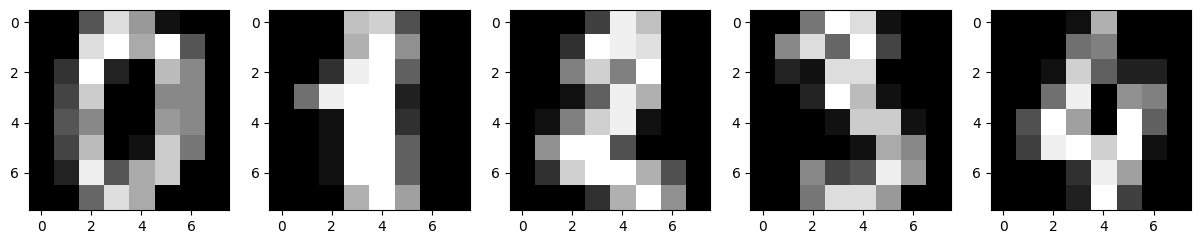

In [2]:
plt.figure(figsize=(15, 4))
for i, (img, lbl) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray)

## **BASIC MODEL SETUP**

### Splitting Data into Training and Test Sets (Digits Dataset)
While making training a model is important, the main goal of a model is to perform well on new, unseen data, not just the data it was trained on.
So we split our dataset into two parts:
1) Training data
2) Testing data
In Sklearn, this is done using
```
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```
Below, we split the data into 75% training data and 25% testing data (defined in test_size). Random state is the seed with which the data is "randomly" split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Logistic Regression

Now that we have split the data, we make an instance of the model that we choose.
For now, we will choose Logistic Regression.

Logistic Regression is used for classification, not prediction of continuous values. Like linear regression, it finds a best-fit line (or hyperplane) through the data, but instead of predicting any number, it squeezes the output into a probability between 0 and 1. That probability is then used to decide which class the data point belongs to.

In contrast, linear regression directly predicts numerical values (like house prices), while logistic regression predicts the likelihood of belonging to a category (like spam vs. not spam).

Below, we instantiate the model

In [19]:
logisticRegr = LogisticRegression(max_iter = 10000)

Here, max_iter is used to just increase the number of training iterations. The default is set to 100, and with the digits dataset, this is too few. We get a convergence warning otherwise.

Depending on the model and the complexity of the dataset, you may not need this.

**Now we fit the model to our dataset** using the ```fit``` method. The fit method takes a data argument and a label argument, this is generally the same for every model

In [21]:
logisticRegr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


**Predict the labels of new data new images** using imformation learned from training process above

In [6]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

### Model Performance

accuracy of data: correct predictions / total number of data points

In [24]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [ ]:
Now lets learn about some other models

# Other prediction models
now that we know how to use and determine the accuracy of the Logistic Regression model, let us try with several other classification models that we can use today

### Decision Tree Classifier

A Decision Tree Classifier predicts a class by breaking a problem into a sequence of simple decisions, where each step asks a question about one feature (like “are there more light pixels or dark pixels?”). Based on the answers, the data moves down different branches of the tree until it reaches a final leaf, which gives the predicted class.

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
predictions_dtc = dtc.predict(x_test)

print(f"score for dtc : {dtc.score(x_test, y_test)}") # slightly worse than logistic regression

score for dtc : 0.8511111111111112


### K-Neighbors Classifier

A K-Neighbors Classifier (KNN) predicts the class of a data point by looking at the K most similar data points it has seen before and choosing the most common class among them.
So actually there's no real "training" per say, KNN stores all the data and predictions are based on distance (similarity).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k_neigh = KNeighborsClassifier(n_neighbors=3)

In [15]:
k_neigh.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
predictions_k_neigh = k_neigh.predict(x_test)

print(f"score for k-neighbors : {k_neigh.score(x_test, y_test)}")

score for k-neighbors : 0.9866666666666667


### Support Vector Machines (SVM)

SVM is a classifier that finds the best possible boundary between classes by choosing the line (or surface) that maximizes the gap (margin) between them, making the separation as clear and confident as possible.
This intuition might be a little hard to see, so lets consider this analogy:
- Imagine separating cats and dogs with a fence: Many fences could separate them, but SVM chooses the fence that leaves the widest possible space between the closest cat and the closest dog. That way, even if new animals show up near the fence, the separation is still reliable.

In general SVMs focus on the most important data points (called support vectors) and tries to make the cleanest, most robust split

In [22]:
from sklearn.svm import SVC
model_svm = SVC(kernel="rbf")

In [24]:
model_svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
predictions_svm = model_svm.predict(x_test)
print(f"first 10 test labels:       {predictions_svm[:10]}") 
print(f"first 10 prediction values: {y_test[:10]}") 
print(f"score for support vector machine : {model_svm.score(x_test, y_test)}")

first 10 test labels:       [2 8 2 6 6 7 1 9 8 5]
first 10 prediction values: [2 8 2 6 6 7 1 9 8 5]
score for support vector machine : 0.9911111111111112




### (Neural Network) MLPClassifier

An MLPClassifier is a type of neural network that predicts classes by passing input features through multiple layers of interconnected “neurons”, each layer learning increasingly complex patterns, until the final layer outputs the predicted class.
- Learns non-linear relationships
- Can handle complex problems that simpler models (like logistic regression or decision trees) might miss
- Requires more data and training time

In [30]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10000)

In [31]:
model_mlp.fit(x_train, y_train)

,hidden_layer_sizes,"(64,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10000
,shuffle,True
,random_state,None


In [32]:
predictions_mlp = model_mlp.predict(x_test)
print(f"score for mlp neural network : {model_mlp.score(x_test, y_test)}")

score for mlp neural network : 0.9844444444444445


### Next Steps

The models given above increase in complexity as we go down. There is also some link between a model's complexity and how well it performs, however, **generalisations** are very important in machine learning and sometimes we want to choose simpler models.

A model that is very complex can fit the training data perfectly, but on new, unseen data, it might perform poorly.

This is called the bias-variance tradeoff:
- Complex model → Low bias, high variance → overfits
- Simple model → Higher bias, lower variance → better generalization

In general, we should choose models like this:
1) Start with baseline simple models (e.g., logistic regression or small decision tree).
2) Evaluate performance on validation data.
3) If performance is insufficient, try more complex models (random forests, SVM, neural nets).
4) (If able) tune model parameters and compare results.
5) Choose the simplest model that meets performance requirements.

**Now let's try saving a model and drawing some new digits of our own**